# Uczenie nadzorowane - wiadomości wstępne

Uczenie nadzorowane to proces, w którym budowa mechanizmu pozwalającego na rozwiązanie problemu jest dokonywana na podstawie przykładów ($\textbf{próbek}$) treningowych $\textbf{etykietowanych}$. Dwie podstawowe kategorie problemów rozwiązywanych z wykorzystaniem metod uczenia nadzorowanego to $\textbf{klasyfikacja}$ i $\textbf{regresja}$. W pierwszym przypadku, etykieta próbki ma charakter $\textbf{jakościowy}$ (odpowiada kategorii, do której należy próbka), w drugim - ma charakter  $\textbf{ilościowy}$ (reprezentuje wynik przekształcenia próbki wejściowej).

## Klasyfikacja

Najogólniejsze kryterium podziału istniejących strategii klasyfikacji to zasada, według której podejmowana jest decyzji odnośnie przynależności próbki do klasy. Trzy stosowane podejścia (w istocie, nie są one rozłączne) to:
-  Klasyfikacja minimalnoodległościowa
-  Klasyfikacja Bayesowska
-  Klasyfikacja przez podział przestrzeni cech

W pierwszym przypadku, o przynależności próbki do danej klasy decyduje podobieństwo tej próbki do klasy (wyrażane jako odległość). W drugim, próbka jest klasyfikowana na podstawie oceny prawdopodobieństwa przynależności do klasy, a w trzecim, przynależność próbki wyznacza jej położenie w odpowiednio 'podzielonej' przestrzeni.

Najprostsza koncepcyjnie (i niestety, najmniej skuteczna) strategia klasyfikacji to klasyfikacja minimalnoodległościowa. Jej sedno to ocena odległości próbki od klasy. To stwierdzenie implikuje konieczność precyzyjnego zdefiniowania sposobu rozumienia odległości między próbką (próbka może być reprezentowana przez skalar, wektor lub macierz), a klasą, która może być 'modelowana' na różne sposoby. Zależnie od konkretnej postaci, jaką przyjmie model klasy, wyróżniać będziemy różne rodzaje klasyfikacji minimialnoodległościowej. Najprostszym jest metoda najbliższego sąsiada (ang. $\textit{Nearest Neighbor}$ - NN), gdzie model klasy to po prostu zapamiętane wszystkie przykłady treningowe, a odległość próbki od klasy to odległość (np. Euklidesa) do najbliższej próbki w tej klasie. Rozwinięciem metody NN, dającym jakościową poprawę skuteczności działania, jest metoda k-najbliższych sąsiadów (k-NN). W metodzie k-NN próbka jest zaliczana do klasy, której etykiety dominują wśród k-najbliższych elementów próbki nieznanej.

Aby możliwe było poprawne określanie podobieństwa próbki do klasy dla próbek wielowymiarowych (powyżej 1D), konieczne jest przeprowadzenie normalizacji wartości elementów wektora opisującego próbkę. Istnieją dwie podstawowe metody normalizacji: do stałego przedziału wartości ([MIN ... MAX]) oraz z wykorzystaniem statystyk rozkładu wartości elementów (wartości średniej i odchylenia standardowego).

### Implementacja klasyfikatora NN / k-NN

Ponieważ program wdrażający algorytmy klasyfikacji będzie korzystać z macierzowej reprezentacji danych, a wyniki jego działania na różnych etapach będą prezentowane w postaci graficznej, do kodu zostaną włączone odpowiednie dla realizacji tych zadań biblioteki języka Python: numpy i matplotlib.pyplot. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Załóżmy, że utworzone zostały dwie klasy: wilki (W) i jamniki (J). do których klasyfikowane mają być nowo zaobserwowane zwierzęta. Wiedza o obydwu klasach została uzyskana poprzez przykładowe informacje o ich przedstawicielach, przy czym dostępne informacje obejmują dwie cechy: masę i 'długość' (odległość np. od nasady pyska do ogona). Posiadane dane to po trzy przykłady dla obydwu klas (dane opisujące pojedynczy 'obiekt' są przedstawiane w postaci wektora kolumnowego o dwóch komponentach: masa [kg] i długość [cm]). 

In [2]:
Dane = np.array([[40,52,36,12,17,8],[80,94,88,42,55,38]])
print(Dane)
Etykiety = np.array([1,1,1,0,0,0])

[[40 52 36 12 17  8]
 [80 94 88 42 55 38]]


Rozważanym klasom przypisano odpowiednio etykiety: 0 - Jamniki i 1 - Wilki.

W przypadku gdy ocena podobieństwa próbek wielowymiarowych ma być dokonywana na podstawie obliczania ich wzajemnych odległości, konieczna jest normalizacja zakresów wartości wszystkich rozważanych cech. Możliwa normalizacja to sprowadzenie zakresu zmienności dla każdego z elementów wektora cech do tego samego przedziału (np. [0 ... 1]). Odpowiednia funkcja realizująca tą operację dla przekazywanej w jej argumencie macierzy (o strukturze: kolejne próbki w kolumnach), ma postać:

In [6]:
x=Dane
print(x.min(axis=1)[:,None])
print(x.min(axis=1))
print(x)
print(x - x.min(axis=1))
# (x - x.min(axis=1)[:,None]) / (x.max(axis=1)[:,None] - x.min(axis=1)[:,None] )

[[ 8]
 [38]]
[ 8 38]
[[40 52 36 12 17  8]
 [80 94 88 42 55 38]]


ValueError: operands could not be broadcast together with shapes (2,6) (2,) 

In [3]:
def normalizuj(x) :
    return (x - x.min(axis=1)[:,None]) / (x.max(axis=1)[:,None] - x.min(axis=1)[:,None] )

In [9]:
def normalizuj(x) :
    return (x - x.min(axis=1)[:,None]) / (x.max(axis=1)[:,None] - x.min(axis=1)[:,None] )

Wykres, przedstawiający rozkład próbek w przestrzeni dwuwymiarowej (po dokonaniu normalizacji), został wygenerowany poniżej) 

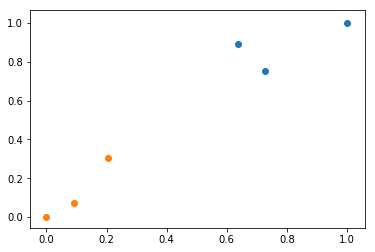

In [10]:
D = normalizuj(Dane)
%matplotlib inline
plt.scatter(D[0,Etykiety==1],D[1,Etykiety==1])
plt.scatter(D[0,Etykiety==0],D[1,Etykiety==0])

Istota rozważanej metody klasyfikacji to ocena odległości. Załóżmy, że jako miara odległości przyjęta została norma L2 (odległość Euklidesa) i że będzie ona wyznaczana za pomocą funkcji:

In [12]:
def L2(p,q) :
    return np.sqrt ( np.sum((p-q)**2) )

Załóżmy, że przedmiotem klasyfikacji będzie obiekt S, o losowo ustalanych parametrach. Klasyfikacja metodą NN polega na obliczeniu odległości między tym obiektem, a próbkami obydwu klas i wybór klasy, zawierającej próbkę najbliższą. 

Jamnik


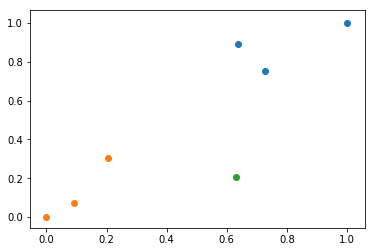

In [22]:
S = np.random.rand(2,1)
plt.scatter(D[0,Etykiety==1],D[1,Etykiety==1])
plt.scatter(D[0,Etykiety==0],D[1,Etykiety==0])
plt.scatter(S[0],S[1])  
# klasyfikacja NN
Dist_W= np.sum( (D[:,Etykiety==1] - np.ones(D[:,Etykiety==1].shape)*S)**2,axis=0)
Dist_J = np.sum( (D[:,Etykiety==0] - np.ones(D[:,Etykiety==0].shape)*S)**2,axis=0)
if np.min(Dist_W) < np.min(Dist_J) :
    print('Wilk')
else :
    print('Jamnik')

Podstawą dla budowania algorytmów uczenia maszynowego w ramach przedstawianego kursu będzie biblioteka języka Python o nazwie 'sklearn'. Biblioteka ta zawiera implementacje większości, zarówno podstawowych jak i zaawansowanych, metod uczenia maszynowego. W odniesieniu do zadań klasyfikacji i regresji, typowym schematem korzystania z procedur implementujących odpowiednie narzędzia programowe, będzie wywoływanie dwóch funkcji: $\tt{fit(x)}$ i $\tt{predict(s)}$. Pierwsza z nich odpowiada za dopasowanie modelu używanego przez wybrany algorytm do danych treningowych, przekazanych w zmiennej $x$ (estymacja parametrów modelu), zaś druga - oblicza wynik aplikacji dopasowanego modelu do danych. Aby móc korzysać z tych funkcji, konieczne jest zaimportowanie biblioteki, a następnie, wykorzystanie odpowiedniego algorytmu. Algorytmy klasyfikacji minimalnoodległościowej znajdują się w pakiecie $\tt{neighbors}$, a rozważany algorytm jest reprezentowany przez obiekt $\tt{KNeighborsClassifier}$. Konstruktor tego obiektu przyjmuje jako argument liczbę najbliższych sąsiadów, jaka ma być używana w rozstrzyganiu przynależności nieznanego obiektu do klasy. Fragment kodu, realizujący dokładnie taką funkcjonalność, jak zapisana we wcześniejszej części jest następujący:

In [23]:
from sklearn import neighbors

klas_NN = neighbors.KNeighborsClassifier(1)
klas_NN.fit(D.T, Etykiety)
if(klas_NN.predict(S.T) == 0):
    print('Jamnik')
else :
    print('Wilk')

Jamnik


## Regresja

Celem regresji jest określenie zależności funkcyjnej wiążącej próbki z ich etykietami ilościowymi. Z kolei znajomość takiej zależności jest podstawą predykcji - określenia wartości dla nieznanej wcześniej próbki. Standardowym przykładem wykorzystania regresji jest przewidywanie cen kursów akcji, którego można próbować dokonać w drodze wykorzystania metod uczenia maszynowego. Zbiór danych treningowych to w tym przypadku pary ($\textbf{x},y$), gdzie $\textbf{x}$ może być wektorem zawierającym szereg wartości wskaźników uznanych za istotne dla ceny akcji, a $y$ to odpowiadająca im wartość akcji. Celem uczenia jest znalezienie parametrów modelu, który będzie najlepiej modelował nieznaną zależność. W rozważanym przykładzie model to pewna  funkcja $y = f(\textbf{x},\theta)$, która może być parametryczna lub nieparametryczna. W pierwszym przypadku, cel uczenia to znalezienie takich wartości parametrów $\theta$, dla których zgodność obserwowanych relacji i relacji określanych za pomocą funkcji jest największa.

Najprostszym pomysłem na regresję nieparametryczną jest regresja metodą k-najbliższych sąsiadów, stanowiąca adaptację metody k-NN klasyfikacji danych. Regresja k-NN polega na znalezieniu dla nieznanego wektora zbioru k-najbliższych sąsiadów, a następnie, na określeniu wartości nieznanej etykiety na podstawie etykiet znalezionych sąsiadów. W najprostszym wariancie, nieznana etykieta staje się wartością średnią etykiet sąsiadów, w wariancie sensowniejszymi - średnią ważoną, gdzie wagi są odwrotnie proporcjonalne do odległości od sąsiadów (czyli, im sąsiad jest dalej, tym jego wpływ na wartość obliczanej etykiety jest mniejszy). Dla potrzeb wyznaczania regresji k-NN w pakiecie $\tt{sklearn.neighbors}$ znajduje się obiekt $\tt{KNeighborsRegressor}$.

### Regresja parametryczna - liniowa

...